<center> <h1><u>EN2550: Assignment 03 on Object Counting on a Conveyor Belt</u></h1>
</center>


* Name: B.S.V.W.Munasinghe
* Index Number: 190397E

## <u>Connected Component Analysis</u>

### (1) Displaying the images

In [77]:
#Importing libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

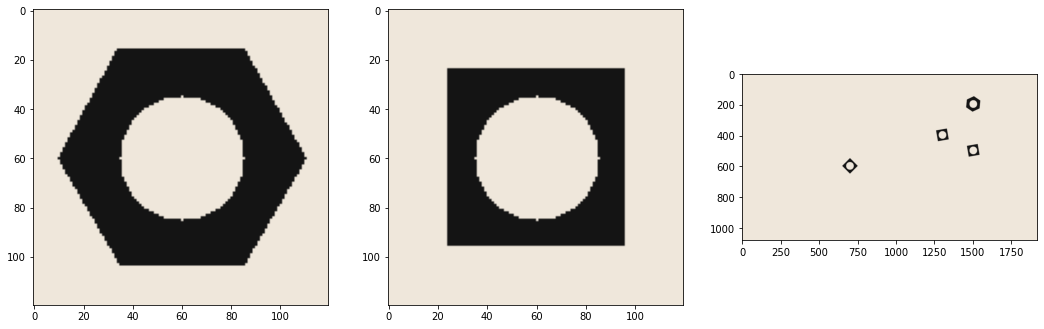

In [78]:
hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

images = [hexnut_template,squarenut_template,conveyor_f100]

fig, ax = plt. subplots(1,3,figsize=(18,6))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

### (2) Apply Otsu's thresholding to obtain the binarized images

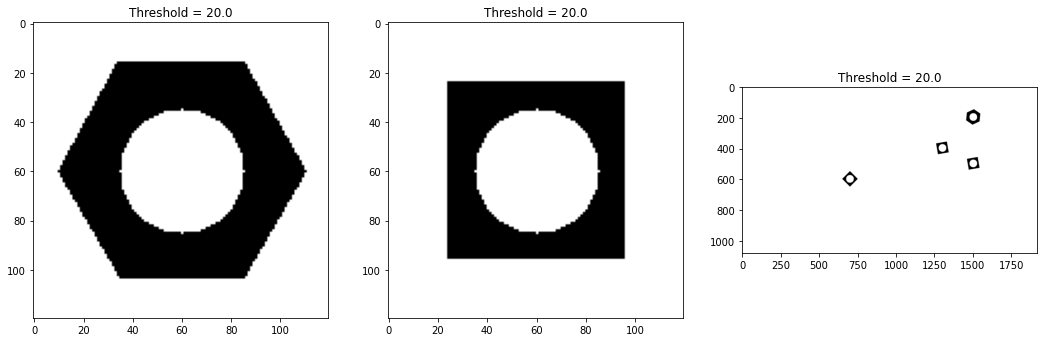

In [79]:
hexnut_grey = cv.imread('hexnut_template.png', cv.IMREAD_GRAYSCALE)
squarenut_grey =  cv.imread('squarenut_template.png', cv.IMREAD_GRAYSCALE)
conveyor_f100_grey =  cv.imread('conveyor_f100.png', cv.IMREAD_GRAYSCALE)
conveyor_f101_grey =  cv.imread('conveyor_f101.png', cv.IMREAD_GRAYSCALE)

greys = [hexnut_grey,squarenut_grey,conveyor_f100_grey]

otsu_images = []
fig, ax = plt. subplots(1,3,figsize=(18,6))

for i in range(3):    
    val,th = cv.threshold(greys[i],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    otsu_images.append(th)
    ax[i].imshow(cv.cvtColor(th, cv.COLOR_RGB2BGR))
    ax[i].set_title("Threshold = "+str(val))
  
plt.show()

### (3) Morphological closing to remove small holes inside the foreground using a 3×3 kernel.

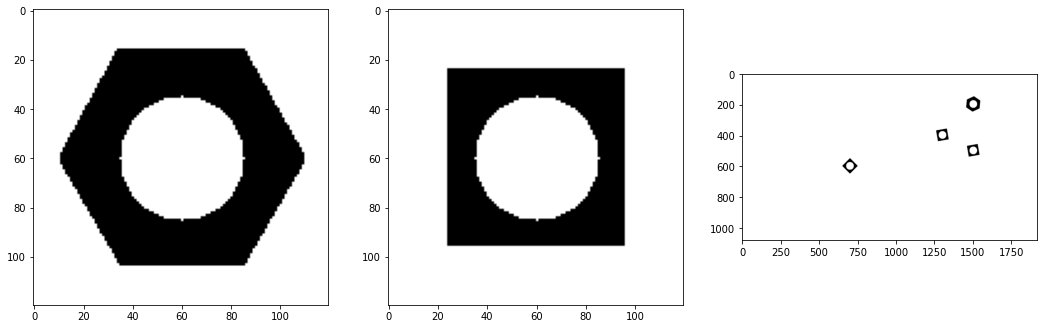

In [80]:
morph_kernal = np.ones((3,3),np.uint8)
morph_images = []

fig, ax = plt. subplots(1,3,figsize=(18,6))

for i in range(3):    
    m1 = cv.morphologyEx(otsu_images[i], cv.MORPH_CLOSE, morph_kernal)
    morph_images.append(m1)
    ax[i].imshow(cv.cvtColor(m1, cv.COLOR_RGB2BGR))
    
  
plt.show()



### (4) Connected components analysis


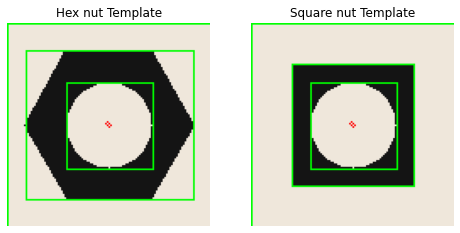

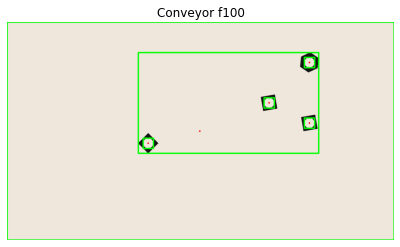

In [81]:
line_widths = [1,1,5]
names = ['Hex nut Template','Square nut Template','Conveyor f100']
f = open("output.txt",'w')
f.write("")
f.close()
f = open("output.txt",'a')

fig, ax = plt.subplots(1,2,figsize=(8,4)) 
fig2,ax2 = plt.subplots(figsize=(8,4)) 

f.write("<ol>")
for i in range(3):
    
    (no_Labels, labels, stats, centroids) = cv.connectedComponentsWithStats(morph_images[i], 4, cv.CV_32S)
    outputs.append((numLabels, labels, stats, centroids))
    
    f.write("<li>Image Name: " + names[i]+"<br><ul><li> Number of conected components: "+str(no_Labels)+"</li>")
    f.write("<li>Statistics: </li></ul>")
    f.write("<table>")
    f.write("<tr><th>Component</th><th>Left</th><th>Top</th><th>Width</th><th>Height</th><th>Area</th><th>Centroid</th></tr>")
    
    output = images[i].copy()
       
    for j in range(no_Labels):
        x = stats[j, cv.CC_STAT_LEFT]
        y = stats[j, cv.CC_STAT_TOP]
        w = stats[j, cv.CC_STAT_WIDTH]
        h = stats[j, cv.CC_STAT_HEIGHT]
        area = stats[j, cv.CC_STAT_AREA]
        (cX, cY) = centroids[j]
        cv.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), line_widths[i])
        cv.circle(output, (int(cX), int(cY)), 1, (0, 0, 255), line_widths[i])
        row = "<tr><td>"+str(j+1)+"</td><td>"+str(x)+"</td><td>"+str(y)+"</td><td>"+str(w)+"</td><td>"+str(h)+"</td><td>"+str(area)+"</td><td>("+str(cX)+","+str(cY)+")</td></tr>"
        f.write(row)
    if i<2:
        ax[i].imshow(cv.cvtColor(output, cv.COLOR_RGB2BGR))
        ax[i].axis('off')  
        ax[i].set_title(names[i])
    else:
        ax2.imshow(cv.cvtColor(output, cv.COLOR_RGB2BGR))
        ax2.axis('off')
        ax2.set_title(names[i])
    f.write("</table></li>")
    f.write("")
f.write("</ol>")
f.close()

### <u>Interpretation of results</u>

The function returns parameters relevent to the bounding boxes that has found for each component:
* Left :- x cordinate of the starting point
* Top :- y cordinate of the starting point
* Width 
* Height 
* Area
* Centroid :- Center point 

Statistic results:
<ol><li>Image Name: Hex nut Template<br><ul><li> Number of conected components: 3</li><li>Statistics: </li></ul><table><tr><th>Component</th><th>Left</th><th>Top</th><th>Width</th><th>Height</th><th>Area</th><th>Centroid</th></tr><tr><td>1</td><td>11</td><td>16</td><td>99</td><td>88</td><td>4722</td><td>(59.83354510800508,59.22257518000847)</td></tr><tr><td>2</td><td>0</td><td>0</td><td>120</td><td>120</td><td>7717</td><td>(59.168847997926655,59.54269793961384)</td></tr><tr><td>3</td><td>35</td><td>35</td><td>51</td><td>51</td><td>1961</td><td>(60.0,60.0)</td></tr></table></li><li>Image Name: Square nut Template<br><ul><li> Number of conected components: 3</li><li>Statistics: </li></ul><table><tr><th>Component</th><th>Left</th><th>Top</th><th>Width</th><th>Height</th><th>Area</th><th>Centroid</th></tr><tr><td>1</td><td>24</td><td>24</td><td>72</td><td>72</td><td>3223</td><td>(59.19578032888613,59.19578032888613)</td></tr><tr><td>2</td><td>0</td><td>0</td><td>120</td><td>120</td><td>9216</td><td>(59.5,59.5)</td></tr><tr><td>3</td><td>35</td><td>35</td><td>51</td><td>51</td><td>1961</td><td>(60.0,60.0)</td></tr></table></li><li>Image Name: Conveyor f100<br><ul><li> Number of conected components: 6</li><li>Statistics: </li></ul><table><tr><th>Component</th><th>Left</th><th>Top</th><th>Width</th><th>Height</th><th>Area</th><th>Centroid</th></tr><tr><td>1</td><td>651</td><td>151</td><td>895</td><td>499</td><td>13930</td><td>(1275.0211055276382,400.110839913855)</td></tr><tr><td>2</td><td>0</td><td>0</td><td>1920</td><td>1080</td><td>2051826</td><td>(956.2473406614401,540.8840496221414)</td></tr><tr><td>3</td><td>1475</td><td>175</td><td>51</td><td>51</td><td>1961</td><td>(1500.0,200.0)</td></tr><tr><td>4</td><td>1275</td><td>375</td><td>51</td><td>51</td><td>1961</td><td>(1300.0,400.0)</td></tr><tr><td>5</td><td>1475</td><td>475</td><td>51</td><td>51</td><td>1961</td><td>(1500.0,500.0)</td></tr><tr><td>6</td><td>675</td><td>575</td><td>51</td><td>51</td><td>1961</td><td>(700.0,600.0)</td></tr></table></li></ol>

### (5) Contour analysis

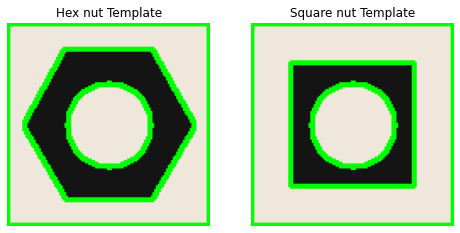

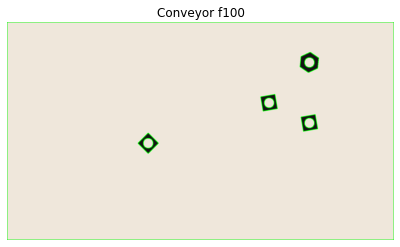

In [95]:
import imutils
fig, ax = plt.subplots(1,2,figsize=(8,4)) 
fig2,ax2 = plt.subplots(figsize=(8,4)) 

for i in range(3):
    im_copy = images[i].copy()
    contours, hierarchy = cv.findContours(morph_images[i], cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    cv.drawContours(im_copy, contours, -1, (0,255,0), 2)
    
    if i<2:
        ax[i].imshow(cv.cvtColor(im_copy, cv.COLOR_RGB2BGR))
        ax[i].axis('off')  
        ax[i].set_title(names[i])
    else:
        ax2.imshow(cv.cvtColor(im_copy, cv.COLOR_RGB2BGR))
        ax2.axis('off')
        ax2.set_title(names[i])

## <u>Detecting Objects on a Synthetic Conveyor</u>

### (1) Playing the sequence

In [91]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.
